# Huffman Coding

Huffman coding is a popular algorithm used for lossless data compression. The basic idea is to assign variable-length codes to input characters, with shorter codes assigned to more frequent characters. This way, the overall length of the encoded data is minimized.

Here's a step-by-step explanation of how Huffman coding works:

1. Frequency Calculation: Calculate the frequency of each character in the input data.

2. Priority Queue: Create a priority queue (or a min-heap) and insert all characters with their frequencies. Each character is treated as a leaf node of a tree.

3. Tree Construction:

    - While there is more than one node in the queue:
        - Remove the two nodes with the lowest frequency from the queue.
        - Create a new internal node with these two nodes as children and with a frequency equal to the sum of their frequencies.
        - Insert the new node back into the queue.
    - The remaining node is the root of the Huffman tree.
4. Code Assignment: Traverse the Huffman tree and assign codes to characters:

    - Assign '0' for the left edge and '1' for the right edge.
    - The code for each character is the sequence of edges from the root to the leaf node representing that character.
5. Encoding: Replace each character in the input data with its corresponding Huffman code.

6. Decoding: Use the Huffman tree to decode the encoded data by traversing the tree according to the sequence of bits.



In [1]:
import cv2
import numpy as np
import heapq
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Define the Node class for the Huffman tree
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Function to build the Huffman tree
def build_huffman_tree(frequency):
    heap = [Node(char, freq) for char, freq in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

# Function to build the Huffman codes
def build_codes(node, prefix="", codebook={}):
    if node is not None:
        if node.char is not None:
            codebook[node.char] = prefix
        build_codes(node.left, prefix + "0", codebook)
        build_codes(node.right, prefix + "1", codebook)
    return codebook

# Function to encode the image using Huffman coding
def huffman_encoding(image):
    flat_image = image.flatten()
    frequency = Counter(flat_image)
    root = build_huffman_tree(frequency)
    codebook = build_codes(root)
    encoded_image = ''.join(codebook[pixel] for pixel in flat_image)
    return encoded_image, root, image.shape

# Function to decode the Huffman encoded image
def huffman_decoding(encoded_image, root, shape):
    decoded_image = []
    node = root
    for bit in encoded_image:
        node = node.left if bit == '0' else node.right
        if node.char is not None:
            decoded_image.append(node.char)
            node = root
    decoded_image = np.array(decoded_image, dtype=np.uint8).reshape(shape)
    return decoded_image

# # Example usage
# image_path = 'Profile Photo.JPG'
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

# encoded_image, tree, shape = huffman_encoding(image)
# decoded_image = huffman_decoding(encoded_image, tree, shape)


# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(image, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title("Decoded Image")
# plt.imshow(decoded_image, cmap='gray')
# plt.axis('off')

# plt.show()

In [45]:
# "Size of original image (in bytes):", image.nbytes

In [46]:
# "Size of encoded image (in bytes):", len(encoded_image) // 8
# len(encoded_image)

In [47]:
# "Compression factor : {}".format(image.nbytes / (len(encoded_image)//8))

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
from keras.datasets import cifar10
(x_train, _), (x_test, _) = cifar10.load_data()


In [4]:
# Convert the first 5 test images to grayscale
from skimage.color import rgb2gray

sample_images = x_test[:5]
sample_images_gray = np.array([rgb2gray(img) for img in sample_images])


In [35]:
from skimage.metrics import structural_similarity as ssim

def calculate_psnr(original, compressed):
    # def decode_binary_to_image(binary_string, shape):
    #     # Split binary string into 8-bit chunks
    #     byte_array = bytes(int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8))
        
    #     # Convert byte array into a NumPy array and reshape to the original image shape
    #     decompressed_image = np.frombuffer(byte_array, dtype=np.uint8).reshape(shape)
    #     return decompressed_image
    
    # compressed = decode_binary_to_image(compressed)
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')  # No error means infinite PSNR
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Function to calculate SSIM
def calculate_ssim(original, compressed):
    return ssim(original, compressed, multichannel=True, data_range=compressed.max() - compressed.min())
    


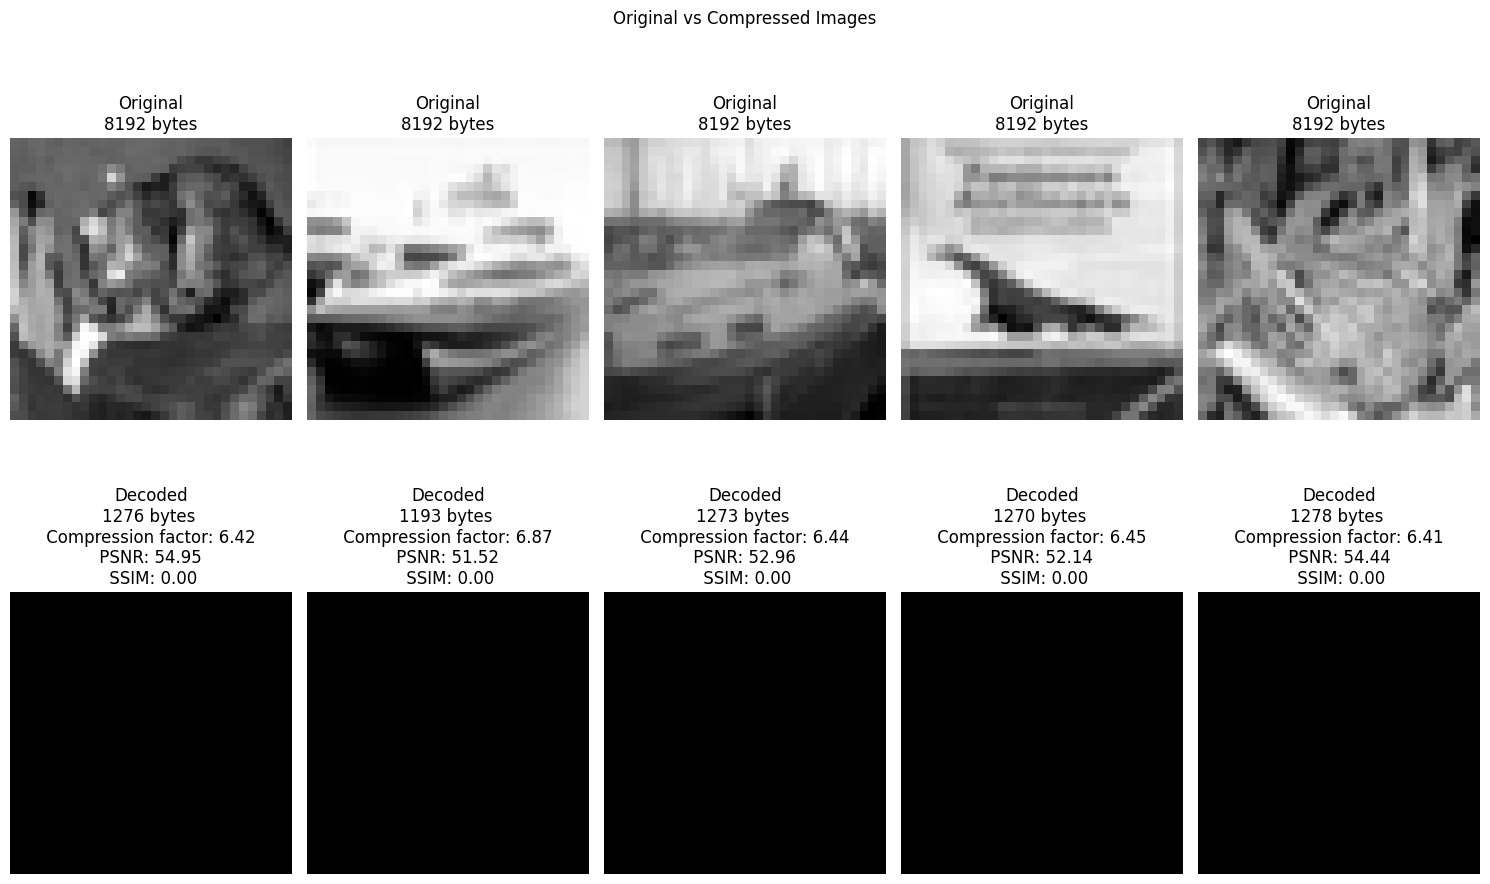

In [36]:
plt.figure(figsize=(15, 10))
for i, img in enumerate(sample_images_gray):
    encoded_image, tree, shape = huffman_encoding(img)
    decoded_image = huffman_decoding(encoded_image, tree, shape)
    compression_factor = img.nbytes / (len(encoded_image)//8)
    psnr = calculate_psnr(img, decoded_image)
    ss = calculate_ssim(img, decoded_image)

    plt.subplot(2, len(sample_images_gray), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original\n{img.nbytes} bytes")
    plt.axis('off')

    plt.subplot(2, len(sample_images_gray), i + 1 + len(sample_images_gray))
    plt.imshow(decoded_image, cmap='gray')
    plt.title(f"Decoded\n{len(encoded_image) // 8} bytes \n Compression factor: {compression_factor:.2f} \n PSNR: {psnr:.2f} \n SSIM: {ss:.2f}")
    plt.axis('off')

plt.suptitle(f"Original vs Compressed Images")
plt.tight_layout()
plt.show()

In [7]:
img

array([[0.45973608, 0.45719843, 0.47735686, ..., 0.39086706, 0.37047843,
        0.34446392],
       [0.45530157, 0.44574706, 0.46504941, ..., 0.38862   , 0.36851412,
        0.35566314],
       [0.44772627, 0.44096235, 0.4532549 , ..., 0.40038471, 0.38446824,
        0.35901922],
       ...,
       [0.45459333, 0.35739529, 0.31145255, ..., 0.34508   , 0.22092118,
        0.30770863],
       [0.42377137, 0.36883961, 0.30495569, ..., 0.28847373, 0.28984275,
        0.22647176],
       [0.39042667, 0.38337216, 0.32451098, ..., 0.27108314, 0.30046863,
        0.2365698 ]])

In [ ]:
encoded_image

'001101110010010100000101000111110110100110101101010010001111000000001101010100110110111110111111110101011010001100111110100000001010111001001010001010000101011101010100000001110101011011110111101000011100001011000010000100100010101110001100100111111011001110001000000000010110110001111110100000010100101000100100101101000001010101011000111100111101100010111111101111101110111010110011001111011100101000100111100010000111110000100101110101110100100111000101001100100010011001010001010000001000001111001001111101100100010110000111101000010110110010001001011100000000101110101110110001111110000110010000001110011010101111000011000010001100111111100000111110110101111011111100111111010110001101110101111111111111111111111001101010110101000011010100111110111110000001101111001100001011011010010011001101101100011111100101111111001010001001110111101010111100100111110010110111000100110001000011000111011100011111110100100101000001011101111001110010101001001011101111011010111001010111100011101101000000011

In [14]:
int(encoded_image, 2)

1414323718376686874275009204363514036278243052652164132142726168319753302250213939793964965636722232444280708853179709091650479005492500838274342787301882525915448678867012269962256566464469888941688551982894776956827832010347125363552326548306741912346809879848054323901884347096596020169485401749618831694108494623259817918362163550454082614827881918481926282235533226034771452365444775395161190051605607295332935100684168497608425491697303789848981359535531316819981242781452240253303471591405237668306340295105280476326633956787090469519980897923514954277774889254061401959880856887943567490632365117390328099440103568850240465907629187417482564687158711100997920358044361066614812455067179226414275383696231721369585778887308431984100504418322924497617192504143035789028045195547768634929505243670622489280161770341213484602657364052997161960853557026895371369638094359884152453976280499053911476804844515969673715031226167906031230390362104088649597127193195376351679502177580739261380570976773

In [15]:
int(encoded_image, 2).to_bytes(len(encoded_image) // 8, byteorder='big')

OverflowError: int too big to convert